In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [50]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [51]:
train.head()

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
0,0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0


In [52]:
train = train.dropna()
X = train.drop(columns=['id','label'])
y = train['label']
X_test = test.drop(columns=['id'])

<AxesSubplot:>

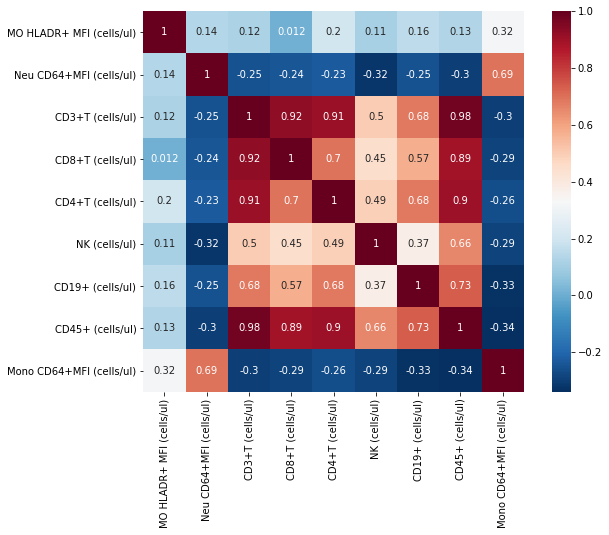

In [54]:
plt.subplots(figsize=(10,7))
sns.heatmap(X.drop(columns = ['Age','Sex 0M1F']).corr(), square=True, annot=True, cmap='RdBu_r')

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

In [71]:
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth = 50, min_samples_split = 5)
rf_reg.fit(X_train, y_train)

print('Train data Accuracy: ', rf_reg.score(X_train, y_train))
print('Val data Accuracy: ', rf_reg.score(X_val, y_val))

Train data Accuracy:  0.8550881587720053
Val data Accuracy:  0.7075880006066262


In [75]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print('Train data Accuracy: ', log_reg.score(X_train, y_train))
print('Val data Accuracy: ', log_reg.score(X_val, y_val))

Train data Accuracy:  0.921875
Val data Accuracy:  0.9545454545454546


In [86]:
y_predict = log_reg.predict(X_test)
y_predict_df = pd.DataFrame(columns = ['id','label'])
y_predict_df['id'] = test['id']
y_predict_df['label'] = y_predict
y_predict_df.to_csv('./data/submission.csv', index = False)